# Prevendo preços com Regressão Linear

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## O Dataset e o Projeto
<hr>

#### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características dos imóveis.</p>


### Dados:
<ul style='font-size: 15px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

### Importando e visualizando os dados

In [2]:
dados = pd.read_csv("HousePrices.csv", sep=';')
dados.head(3)

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0


In [3]:
# Verificando o tamanho do dataset
dados.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

### Verificando informações

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   precos     1000 non-null   int64
 1   area       1000 non-null   int64
 2   garagem    1000 non-null   int64
 3   banheiros  1000 non-null   int64
 4   lareira    1000 non-null   int64
 5   marmore    1000 non-null   int64
 6   andares    1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


## Estatísticas descritivas

In [5]:
dados.describe()

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41985.600000,124.326000,2.009000,3.000000,2.034000,0.331000,0.485000
std,12140.385408,72.389972,0.813376,1.429701,1.418752,0.470809,0.500025
min,13150.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,33112.500000,60.750000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,41725.000000,123.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,51175.000000,187.000000,3.000000,4.000000,3.000000,1.000000,1.000000
max,73675.000000,249.000000,3.000000,5.000000,4.000000,1.000000,1.000000


## Matriz de correlação

In [6]:
dados.corr()

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.000000,0.117689,0.102752,0.124390,0.107209,0.430767,0.631529
area,0.117689,1.000000,-0.007530,-0.011374,0.012114,-0.015270,-0.018006
garagem,0.102752,-0.007530,1.000000,0.067142,0.060455,-0.015629,-0.020588
banheiros,0.124390,-0.011374,0.067142,1.000000,0.048363,-0.025281,-0.018203
lareira,0.107209,0.012114,0.060455,0.048363,1.000000,0.029591,-0.003513
marmore,0.430767,-0.015270,-0.015629,-0.025281,0.029591,1.000000,-0.006527
andares,0.631529,-0.018006,-0.020588,-0.018203,-0.003513,-0.006527,1.000000


<Axes: >

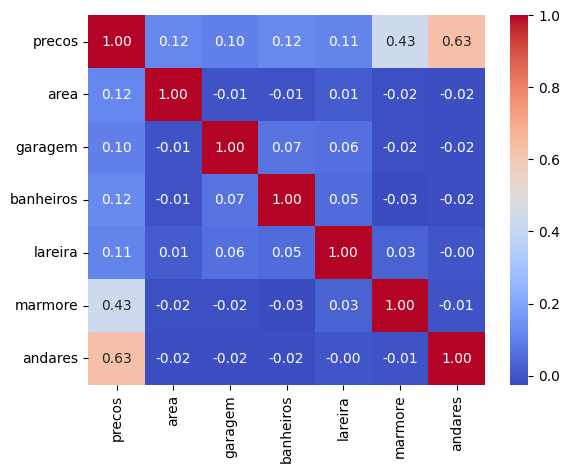

In [7]:
sns.heatmap(dados.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# <font color='red' style='font-size: 23px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Variável *dependente* (y)


<Axes: xlabel='precos'>

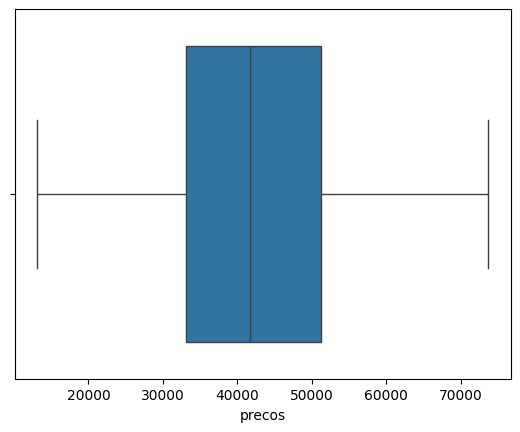

In [8]:
sns.boxplot( x=dados["precos"])

## Investigando a variável dependente juntamente com outras característica


### Box-plot (Preço X Garagem)

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Número de Vagas de Garagem', ylabel='$'>

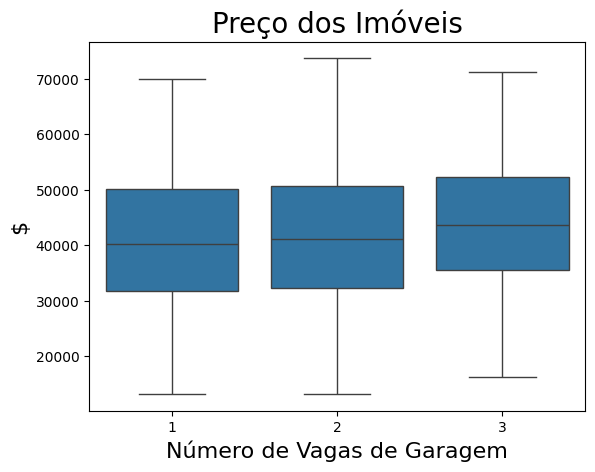

In [9]:
ax = sns.boxplot(y='precos', x='garagem', data=dados)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de Vagas de Garagem', fontsize=16)
ax

### Box-plot (Preço X Banheiros)

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Número de Vbanheiros', ylabel='$'>

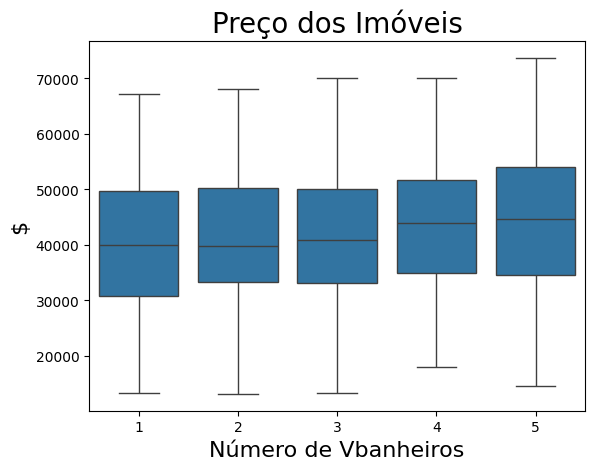

In [10]:
ax = sns.boxplot(y='precos', x='banheiros', data=dados)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de Vbanheiros', fontsize=16)
ax

### Box-plot (Preço X Lareira)

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Número de Lareiras', ylabel='$'>

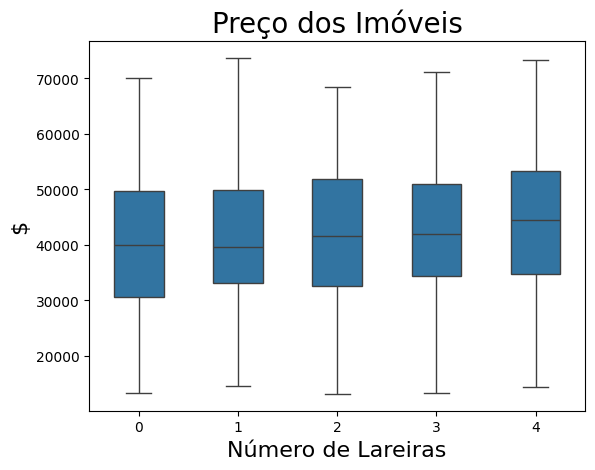

In [11]:
ax = sns.boxplot(y='precos', x='lareira', data=dados, orient='v', width=0.5)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de Lareiras', fontsize=16)
ax

### Box-plot (Preço X Acabamento em Mármore)

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Acabamento em Mármore', ylabel='$'>

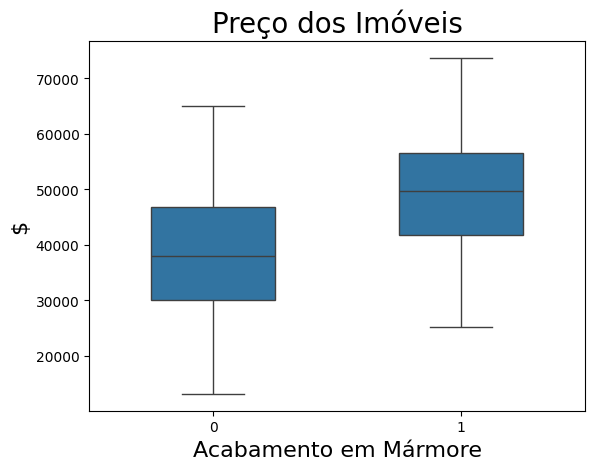

In [12]:
ax = sns.boxplot(y='precos', x='marmore', data=dados, orient='v', width=0.5)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Acabamento em Mármore', fontsize=16)
ax

### Box-plot (Preço X Andares)

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Numero de andares', ylabel='$'>

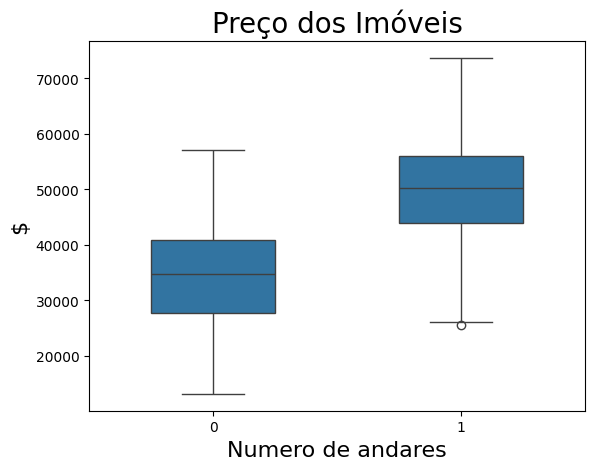

In [13]:
ax = sns.boxplot(y='precos', x='andares', data=dados, orient='v', width=0.5)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Numero de andares', fontsize=16)
ax

## Distribuição de frequências da variável *dependente* (y)

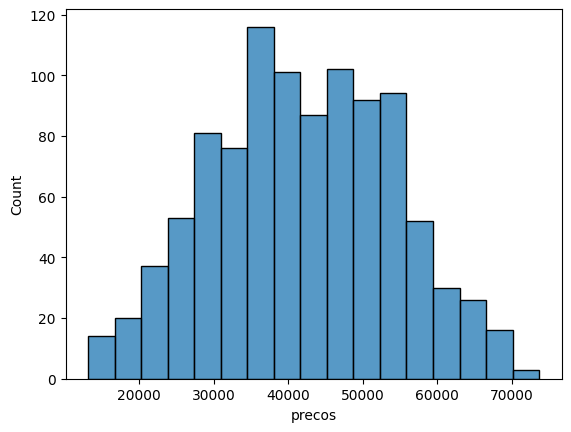

In [14]:
sns.histplot(data=dados, x="precos")
plt.show()

## Gráficos de dispersão entre as variáveis do dataset

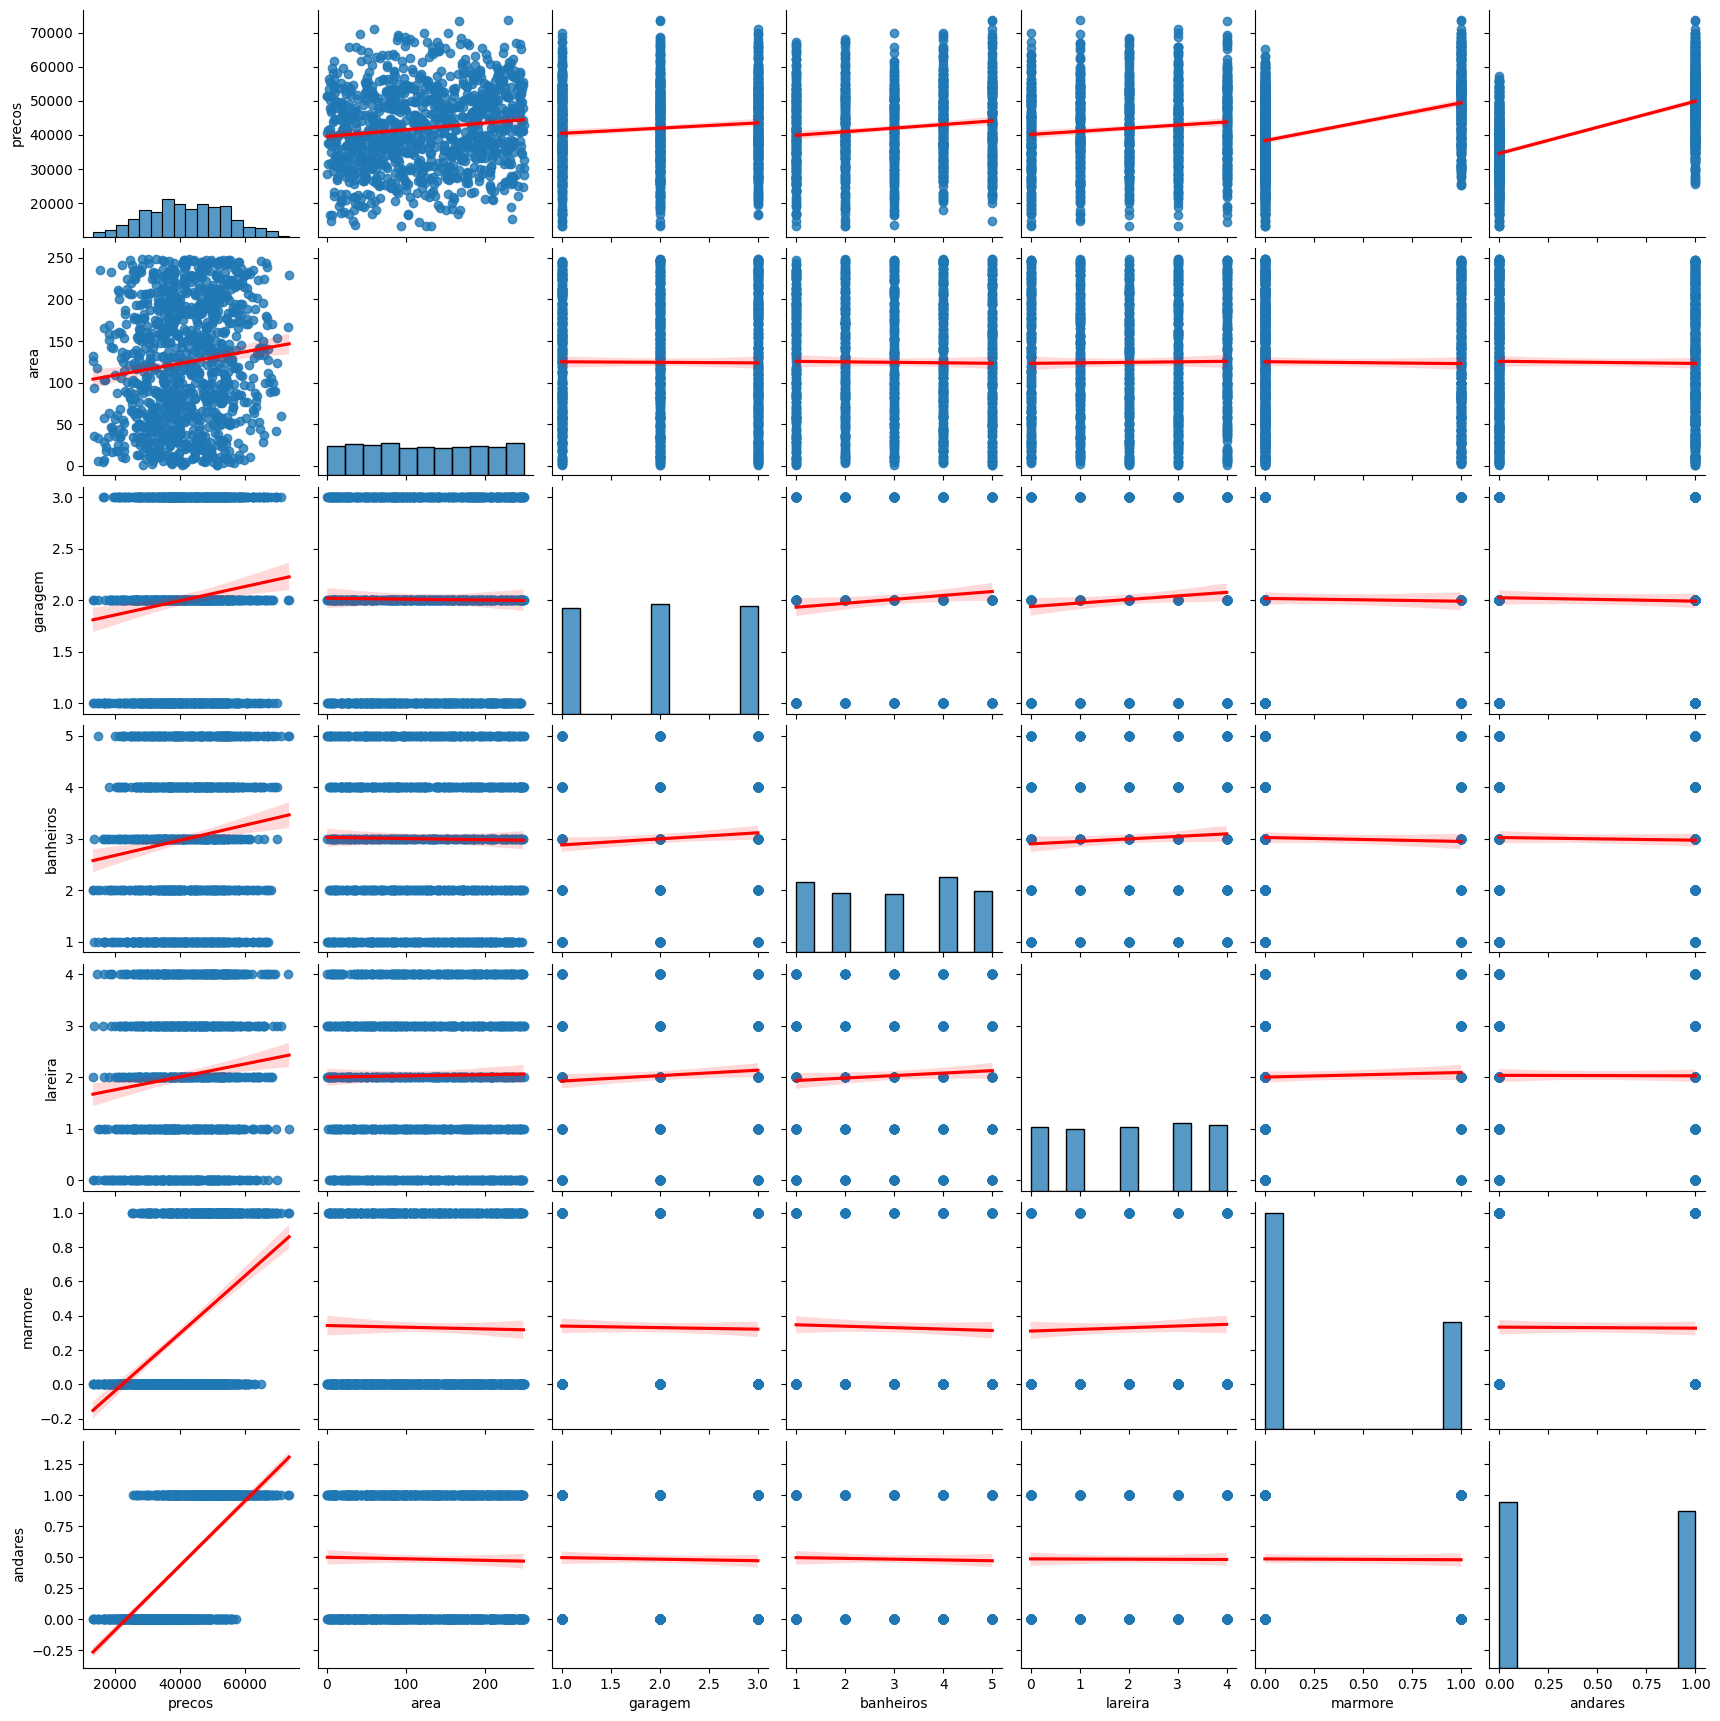

In [15]:
sns.pairplot(dados, kind='reg', plot_kws={'line_kws':{'color':'red'}})

# <font color='red' style='font-size: 25px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

### Separando X e Y

In [16]:
x = dados.drop("precos", axis = 1)
y = dados["precos"]

### Treino e teste

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#  LinearRegression

In [19]:
from sklearn.linear_model import LinearRegression

### Instanciando e fazendo fit

In [20]:
modelo = LinearRegression().fit(x_train, y_train)

## Coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

In [21]:
modelo.score(x_train, y_train).round(2)

0.66

### Gerando previsões 

In [22]:
y_previsto = modelo.predict(x_test)

### Coeficiente de determinação (R²) para as previsões do modelo


In [23]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [24]:
r2_score(y_test, y_previsto).round(2)

0.62

# <font color='red' style='font-size: 25px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples


In [25]:
area=38
garagem=2
banheiros=4
lareira=4
marmore=0
andares=1

entrada=[[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(modelo.predict(entrada)[0]))

$ 46887.02


C:\Users\leand\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Obtendo métricas para o modelo

In [31]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['Erro quadrático medio', 'Erro médio absoluto', 'R²'], columns=['Métricas'])

,Métricas
Erro quadrático medio,55782761.70
Erro médio absoluto,7468.79
R²,0.62


# <font color='red' style='font-size: 20px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

In [27]:
import pickle

## Salvando o modelo estimado

In [28]:
output = open('modelo_preço', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```